평균이동을 이용하여 분류해봄. 여기는 4개 군집으로 나누는게 좋다고 했지만, 이게 원 코드에서 말했던 star, galaxy, quasar대로 구분되지는 않았다. 당연한 결과기는 하다. 모든 feature을 넣었으니까. 분명 star, galaxy, quasar을 결정하는 주요 피쳐가 있을 것이다. 

In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
skyserver_df = pd.read_csv(r'C:\Users\chois\Downloads\archive (2)\Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [3]:
skyserver_df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [4]:
X = skyserver_df.drop(columns=['class'])

In [8]:
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)

In [10]:
print(np.unique(cluster_labels))

[0 1 2 3]


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X) 
skyserver_df['pca_x'] = pca_transformed[:, 0]
skyserver_df['pca_y'] = pca_transformed[:, 1]
skyserver_df.head(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,pca_x,pca_y
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491,2.077338e+18,145.817954
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541,-1.281208e+18,-99.178809
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513,-1.321748e+18,-102.185839


C:\Users\chois\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14572\3323201194.py:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], edgecolor='k', marker=markers[label])


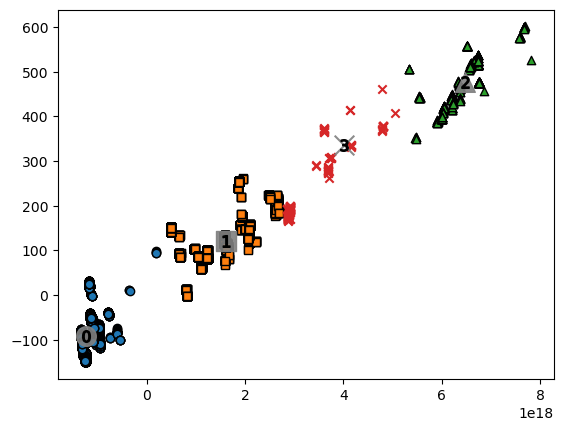

In [16]:
skyserver_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
centers=pca.transform(centers)
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = skyserver_df[skyserver_df['meanshift_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], edgecolor='k', marker=markers[label])

    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' %label)

plt.show()

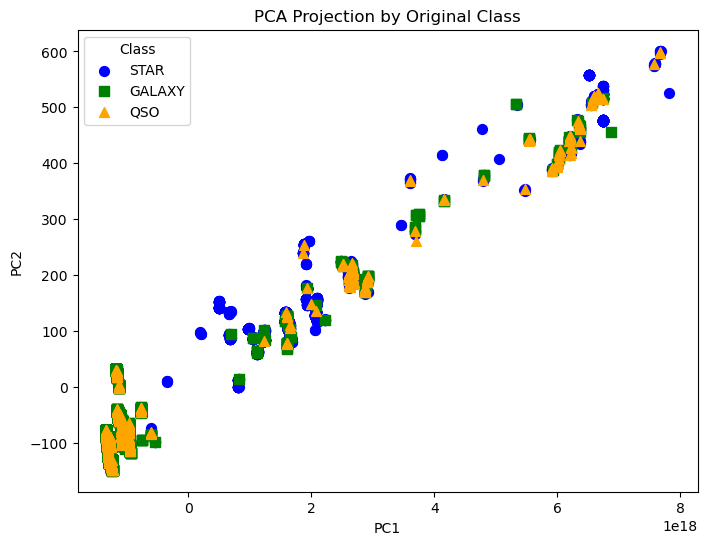

In [20]:
skyserver_df1 = pd.read_csv(r'C:\Users\chois\Downloads\archive (2)\Skyserver_SQL2_27_2018 6_51_39 PM.csv')

# 1. X, y 분리
X1 = skyserver_df1.drop(columns=['class'])
y = skyserver_df1['class']

# 2. PCA로 2차원 축소
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1)

# 3. 클래스별 마커 지정
markers = {'STAR': 'o', 'GALAXY': 's', 'QSO': '^'}
colors = {'STAR': 'blue', 'GALAXY': 'green', 'QSO': 'orange'}

# 4. 시각화
plt.figure(figsize=(8,6))
for label in y.unique():
    idx = (y == label)
    plt.scatter(X1_pca[idx, 0], X1_pca[idx, 1],
                marker=markers[label], 
                color=colors[label], 
                label=label, s=50)

plt.legend(title="Class")
plt.title("PCA Projection by Original Class")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()